In [26]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install statsmodels

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pathlib import Path # I include this so that it will run to all the places with giving error
directory = Path(__name__).parent.absolute()

In [28]:
data = pd.read_csv(str(directory)+'/Datasets/insurance_data.csv')

In [29]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [31]:
data.shape

(27, 2)

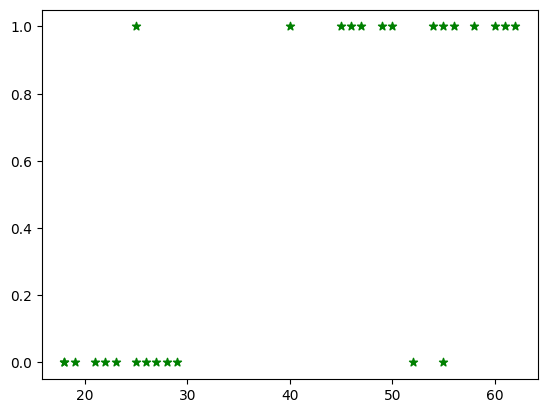

In [32]:
plt.scatter(data.age, data.bought_insurance, marker='*', color='green')

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(data[['age']], data.bought_insurance, test_size=0.2, random_state=42)

In [34]:
xtrain.shape

(21, 1)

In [35]:
xtest.shape

(6, 1)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression()

In [38]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [39]:
model.predict([[42]])

/home/runner/workspace/.pythonlibs/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

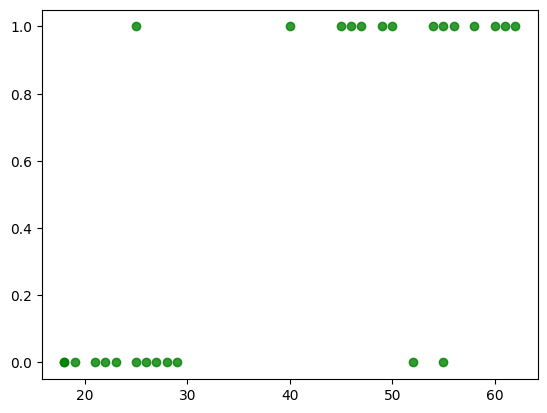

In [40]:
sns.regplot(x=data.age, y=data.bought_insurance,logistic=True, data=data, ci=None, scatter_kws={'color':'green'})

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
ypred = model.predict(xtrain)

In [43]:
cm = confusion_matrix(ypred,ytrain)

In [44]:
cm

array([[ 7,  1],
       [ 2, 11]])

<Axes: >

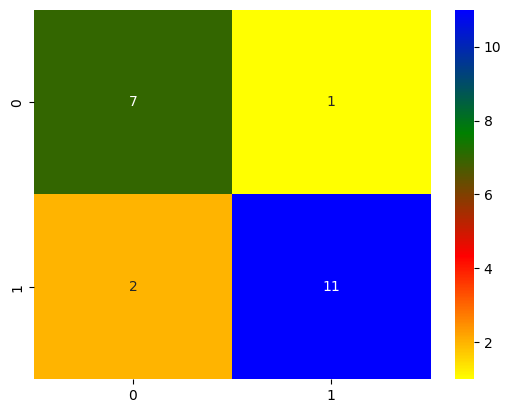

In [45]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['yellow','red','green','blue']
custom_cmap = LinearSegmentedColormap.from_list('my_cmap', colors)
sns.heatmap(cm,annot=True,cmap=custom_cmap)